In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
rdata_path = "../dataset/Sin/sin.csv"

In [2]:
#读取数据
df = pd.read_csv(rdata_path)
print(df.shape)

(1000, 2)


In [5]:
#保存前三天的数据
days3 = df[0:21*3]

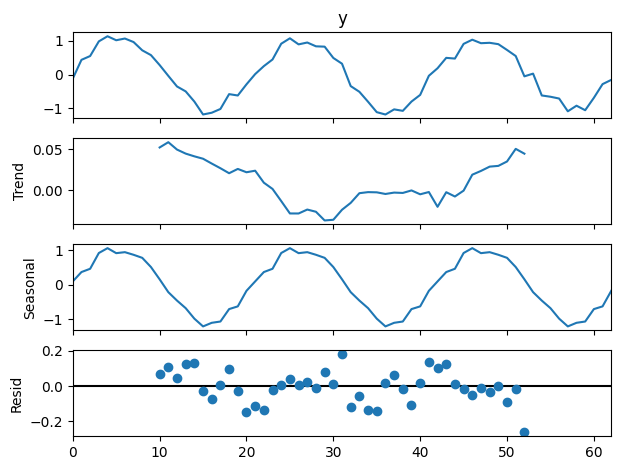

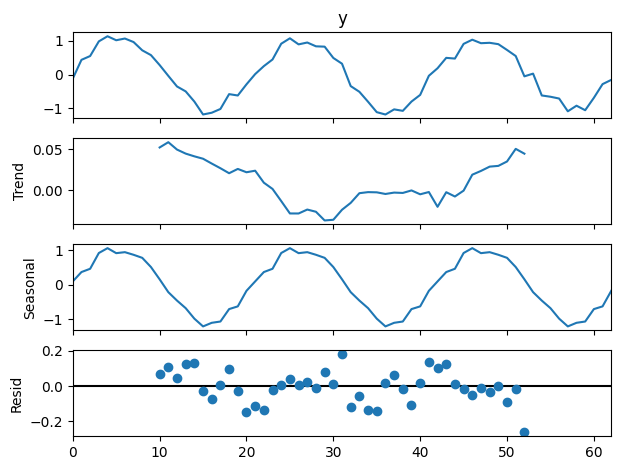

In [6]:
#前三天的风速分解
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(days3['y'],model='addictive',period=21)
decomposition.plot()

In [ ]:
#保存四到六天的数据
days4_6 = df[144*3:144*6]
days4_6.to_csv("days4-6.csv",index=None)
days4_6 = days4_6.fillna(0)

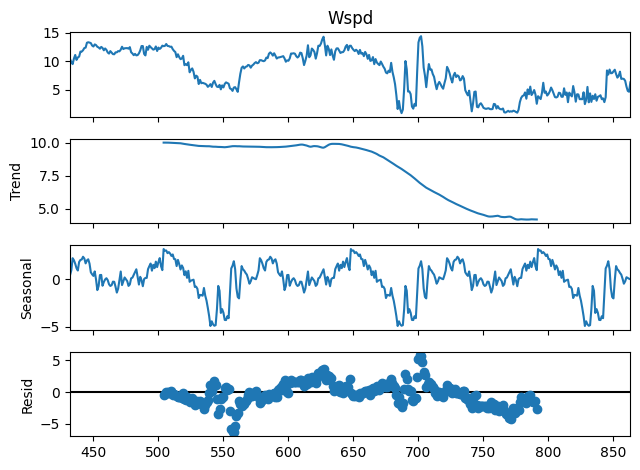

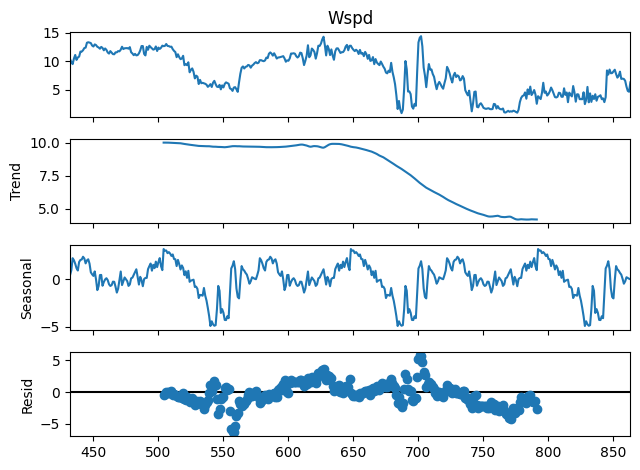

In [ ]:
#四到六天的风速分解
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(days4_6['Wspd'],model='addictive',period=144)
decomposition.plot()

In [ ]:
#保留所有发电功率为0的数据
data  = df.drop(df[df['Patv']  > 0].index)
print(data)

         TurbID  Day Tmstamp  Wspd    Wdir   Etmp   Itmp    Ndir   Pab1  \
0             1    1   00:00   NaN     NaN    NaN    NaN     NaN    NaN   
83            1    1   13:50  5.72    0.08  37.24  48.74   67.22   1.86   
84            1    1   14:00  5.72  -43.83  37.59  49.22   81.45   1.90   
85            1    1   14:10  3.97  -62.36  38.09  49.56   81.45   1.90   
86            1    1   14:20  3.25  -22.98  38.58  49.93   81.45   1.90   
...         ...  ...     ...   ...     ...    ...    ...     ...    ...   
4727391     134  245   02:30  0.71 -104.26  -6.42   0.80  306.46  90.39   
4727392     134  245   02:40  0.88 -125.54  -6.28   0.71  306.46  90.39   
4727393     134  245   02:50  1.28 -101.70  -5.91   0.52  306.46  90.39   
4727394     134  245   03:00  1.38  -99.43  -5.46   0.24  306.46  90.39   
4727395     134  245   03:10  2.85  -78.54  -5.45  -0.01  299.76  90.39   

          Pab2   Pab3  Prtv  Patv  
0          NaN    NaN   NaN   NaN  
83        1.86   1.86  -0.3

<Figure size 1000x600 with 0 Axes>

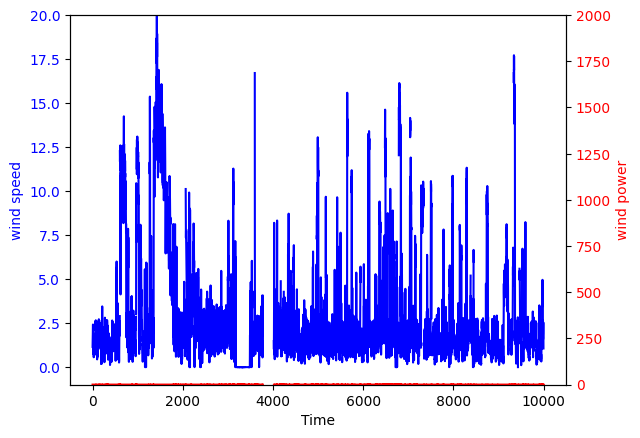

In [ ]:
plt.figure(figsize=(10, 6))
fig, ax1 = plt.subplots()
l1 = ax1.plot(data[['Wspd']].to_numpy().reshape(-1)[10000:20000], label='wind speed', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylim([-1,20])
ax1.set_ylabel('wind speed',color='b')
ax1.tick_params(axis='y',labelcolor='b')

ax2 = plt.twinx()
l2 = ax2.plot(data[['Patv']].to_numpy().reshape(-1)[10000:20000], label='wind power', color='red')
ax2.set_ylabel('wind power',color='r')
ax2.set_ylim([-1,2000])
ax2.tick_params(axis='y',labelcolor='r')
plt.show()

In [ ]:
zero_average = data['Wspd'].to_numpy(na_value=0).reshape(-1).mean()
print(zero_average)

2.42315807517341
